In [ ]:
pip install qiskit==0.46.1 qiskit-aer qiskit_machine_learning==0.7.2 pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of qiskit-aer to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB

In [ ]:
# Step 1: Import pustaka untuk Google Drive
from google.colab import drive

# Step 2: Hubungkan ke Google Drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np

# Membaca dataset dari file CSV
file_path = '/content/drive/MyDrive/KUANTUM/diabetes.csv'
df = pd.read_csv(file_path)

# Pisahkan fitur dan target
x = df.drop(columns=['Outcome'])  # Fitur (semua kolom kecuali 'Outcome')
y = df['Outcome']  # Target (kolom 'Outcome')

indexes = np.array ([i for(i,s) in enumerate(y) if (s==0 or s==1)])
# Use .iloc to select rows based on indexes
x = x.iloc[indexes]  # Corrected line
y = 2 * y.iloc[indexes] - 1  # Corrected line

In [ ]:
# Normalitation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

x = MinMaxScaler().fit_transform(x)

In [ ]:
# Split train-test set (80:20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

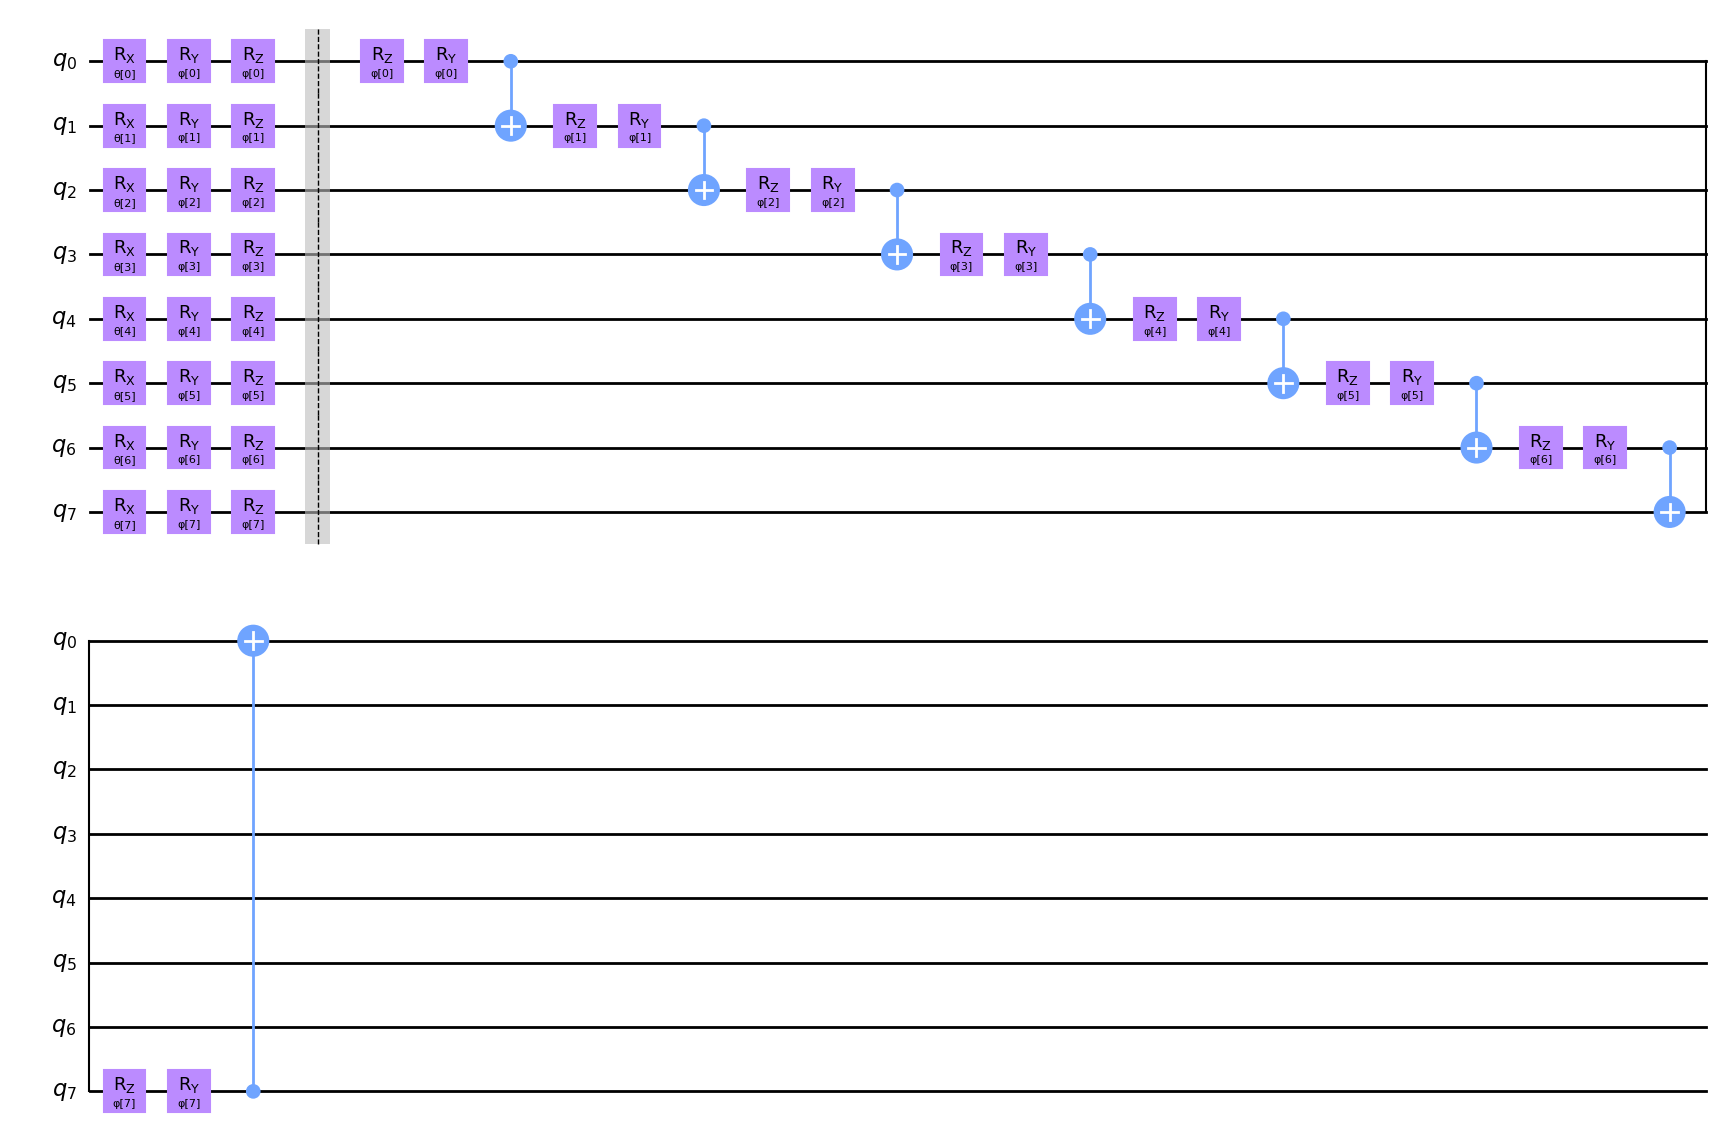

In [ ]:
#Arsitektur sirkuit kuantum
import matplotlib.pyplot as plt
import qiskit
from qiskit.circuit import QuantumCircuit, ParameterVector

#Parameter sirkuit
num_qubits  = x_train.shape[1]

#pilih salah satu aja gapapa
theta       = ParameterVector('θ', num_qubits)
phi         = ParameterVector('φ', num_qubits)
circuit     = QuantumCircuit(num_qubits)

import matplotlib.pyplot as plt
from qiskit.circuit import QuantumCircuit, ParameterVector

# Jumlah qubit sesuai dengan fitur dalam dataset (8 fitur kecuali Outcome)
num_qubits = 8

# Parameter untuk encoding dan ansatz
theta = ParameterVector('θ', num_qubits)  # Encoding data
phi = ParameterVector('φ', num_qubits)    # Ansatz rotasi

# Inisialisasi sirkuit
circuit = QuantumCircuit(num_qubits)

# 1. Data Encoding: Rotasi RX untuk encode input data
for i in range(num_qubits):
    circuit.rx(theta[i], i)
    circuit.ry(phi[i], i)  # Rotasi RY
    circuit.rz(phi[i], i)  # Rotasi RZ

circuit.barrier()

# 2. Ansatz dengan rotasi RY dan RZ
for i in range(num_qubits):

    circuit.rz(phi[i], i)  # Rotasi RY
    circuit.ry(phi[i], i)  # Rotasi RZ
    circuit.cx(i, (i + 1) % num_qubits)  # Operasi kontrol

#
# 3. Entanglement antar qubit
#for i in range(num_qubits - 1):
 #   circuit.cz(i, i + 1)


#plot sirkuit
circuit.draw(output='mpl', style='clifford')

In [ ]:
# Kurva Pembelajaran
objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

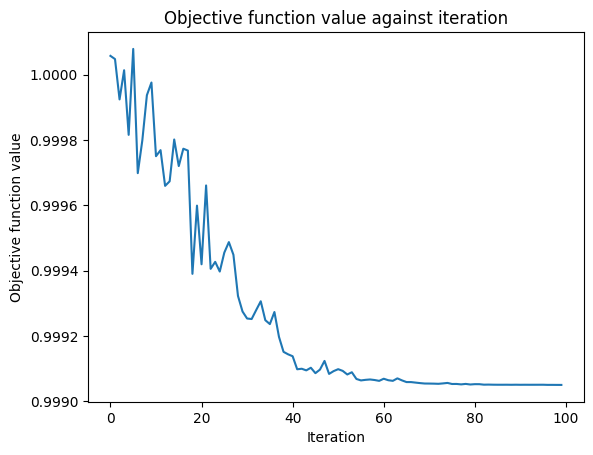

Training time: 0 seconds


In [ ]:
# Classifier
from qiskit import Aer
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.utils import QuantumInstance
from qiskit.opflow import PauliSumOp, StateFn
from qiskit.algorithms.optimizers import COBYLA
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from sklearn.metrics import classification_report

Backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend=Backend, shots=1024)
#observable = PauliSumOp.from_list([('X'*num_qubits, 1.0)])  # Observable
#observable = PauliSumOp.from_list([('ZYZYZYZY', 0.5)])
observable = PauliSumOp.from_list([('ZYZYZYZY', 1.0)])
optimizer = COBYLA(maxiter=100)

qnn_expectation = StateFn(observable, is_measurement=True) @ StateFn(circuit)
estimator_qnn = EstimatorQNN(
    circuit=circuit,
    observables=observable,
    input_params=theta,
    weight_params=phi,
)

# Quantum Neural Network untuk Klasifikasi
qnn = NeuralNetworkClassifier(
    estimator_qnn,
    optimizer=optimizer,
    loss='squared_error',  # Sesuaikan loss function untuk klasifikasi
    callback=callback_graph,
)

# Melatih model
qnn.fit(x_train, y_train)

# Waktu pelatihan
start = time.time()
elapsed = time.time() - start
print(f"Training time: {round(elapsed)} seconds")




In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import classification_report

y_pred_train = qnn.predict(x_train)
y_pred_test = qnn.predict(x_test)

print("Training")
print(classification_report(y_train, y_pred_train))
print("Testing")
print(classification_report(y_test, y_pred_test))

Training
              precision    recall  f1-score   support

          -1       0.66      0.86      0.75       401
           1       0.40      0.17      0.24       213

    accuracy                           0.62       614
   macro avg       0.53      0.52      0.49       614
weighted avg       0.57      0.62      0.57       614

Testing
              precision    recall  f1-score   support

          -1       0.66      0.85      0.74        99
           1       0.42      0.20      0.27        55

    accuracy                           0.62       154
   macro avg       0.54      0.52      0.51       154
weighted avg       0.57      0.62      0.57       154



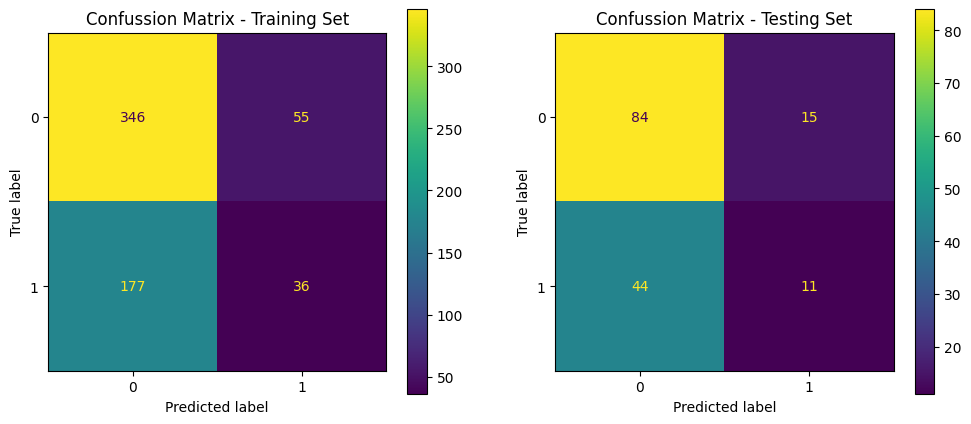

In [ ]:
#Confussion Matrix
cm_tr=confusion_matrix(y_train, y_pred_train)
disp_tr = ConfusionMatrixDisplay(confusion_matrix=cm_tr)
cm_ts=confusion_matrix(y_test, y_pred_test)
disp_ts = ConfusionMatrixDisplay(confusion_matrix=cm_ts)

fig, ax = plt.subplots(1, 2, figsize=(12,5))
disp_tr.plot(ax=ax[0])
ax[0].set_title("Confussion Matrix - Training Set")
disp_ts.plot(ax=ax[1])
ax[1].set_title("Confussion Matrix - Testing Set")
plt.show()

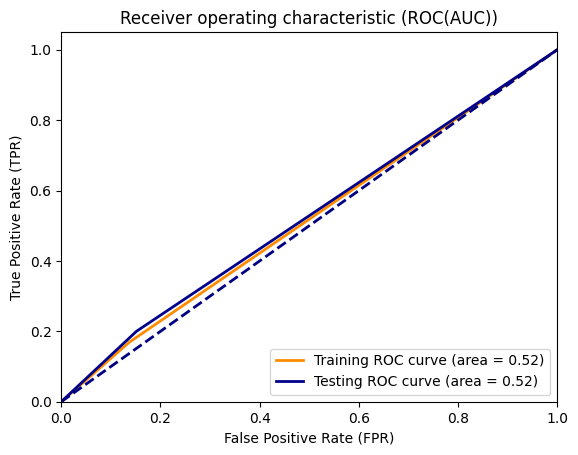

In [ ]:
# kurva ROC(AUC)
fpr_tr, tpr_tr, _ = roc_curve(y_train, y_pred_train)
roc_auc_tr = auc(fpr_tr, tpr_tr)
fpr_ts, tpr_ts, _ = roc_curve(y_test, y_pred_test)
roc_auc_ts = auc(fpr_ts, tpr_ts)

plt.figure()
plt.plot(fpr_tr, tpr_tr, color='darkorange', lw=2, label=f'Training ROC curve (area = {roc_auc_tr:0.2f})')
plt.plot(fpr_ts, tpr_ts, color='darkblue', lw=2, label=f'Testing ROC curve (area = {roc_auc_ts:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver operating characteristic (ROC(AUC))')
plt.legend(loc="lower right")
plt.show()

<ipython-input-14-97748a4d085a>:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(xx, yy, Z, levels=[0.5], colors="black", linewidth=1.5)


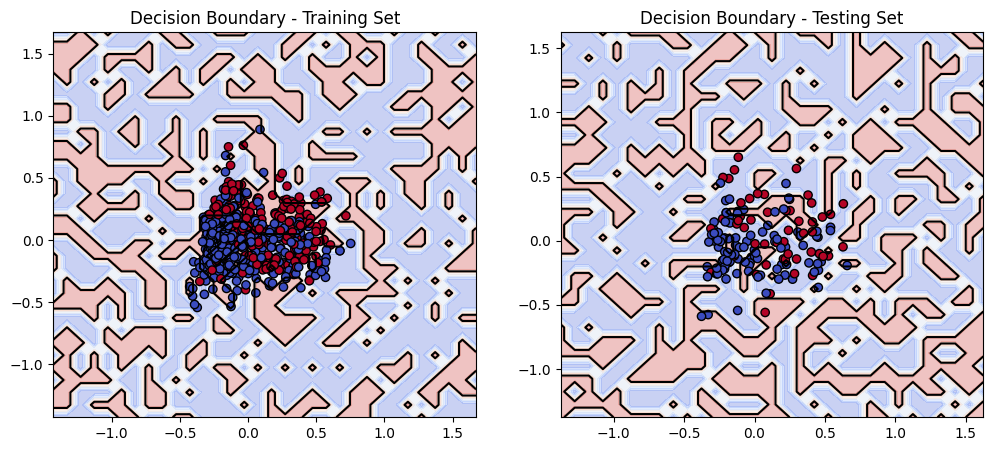

In [ ]:
# Decision Boundary
from sklearn.decomposition import PCA

def plot_decision_boundary(qnn, x, y, ax, title):
  x_min, x_max = x[:, 0].min() - 1, x[:, 0].max()+1
  y_min, y_max = x[:, 0].min() - 1, x[:, 0].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

  # Change here: Create mesh_points with 8 features
  num_features = x_train.shape[1]  # Get the original number of features
  mesh_points = np.c_[xx.ravel(), yy.ravel(), np.zeros((xx.ravel().shape[0], num_features - 2))]

  Z = qnn.predict(mesh_points)
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
  ax.contour(xx, yy, Z, levels=[0.5], colors="black", linewidth=1.5)
  ax.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k', cmap='coolwarm')
  ax.set_title(title)

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

fig, ax = plt.subplots(1, 2, figsize=(12,5))
plot_decision_boundary(qnn, x_train_pca, y_train, ax[0], 'Decision Boundary - Training Set')
plot_decision_boundary(qnn, x_test_pca, y_test, ax[1], 'Decision Boundary - Testing Set')
plt.show()

